In [130]:
#  #This example uses Python 2.7 and the python-request library.

# from requests import Request, Session
# from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
# import json

# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# parameters = {
#   'start':'1',
#   'limit':'5000',
#   'convert':'USD'
# }
# headers = {
#   'Accepts': 'application/json',
#   'X-CMC_PRO_API_KEY': '60e4d324-1f24-42b1-8d2b-66d9a6f57ad0',
# }

# session = Session()
# session.headers.update(headers)

# try:
#   response = session.get(url, params=parameters)
#   data = json.loads(response.text)
#   print(data)
# except (ConnectionError, Timeout, TooManyRedirects) as e:
#   print(e)

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [132]:
df = pd.read_csv("./inputs/crypto-markets.csv")
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [133]:
df.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [134]:
df.dtypes, df.shape

(slug            object
 symbol          object
 name            object
 date            object
 ranknow          int64
 open           float64
 high           float64
 low            float64
 close          float64
 volume         float64
 market         float64
 close_ratio    float64
 spread         float64
 dtype: object,
 (942297, 13))

In [135]:
df['date'] = pd.to_datetime(df['date'])

In [136]:
df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06


In [137]:
df['name'].nunique()

2071

In [138]:
df.isna().sum()

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

<Axes: xlabel='name'>

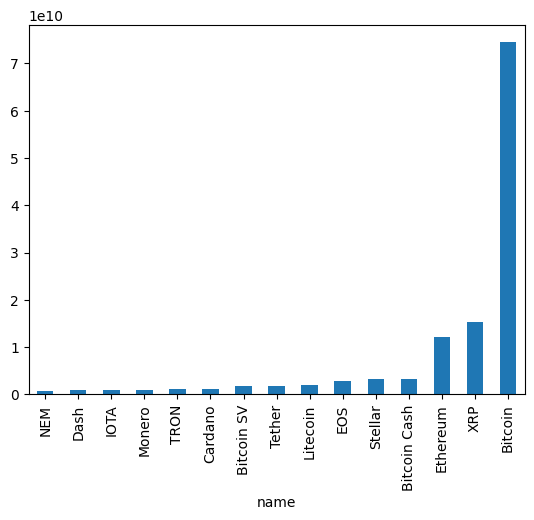

In [139]:
df.groupby(['name'])['market'].last().sort_values(ascending=False).head(15).sort_values().plot(kind='bar')

<Axes: xlabel='name'>

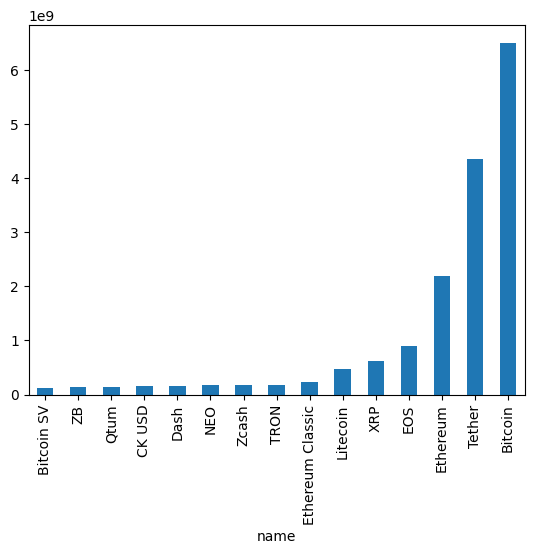

In [140]:
df.groupby(['name'])['volume'].last().sort_values(ascending=False).head(15).sort_values().plot(kind='bar')

In [141]:
top10 = df.groupby(['name'])['market'].last().sort_values(ascending=False).head(10).index
data_top10 = df[df['name'].isin(top10)]

top5 = df.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
data_top5 = df[df['name'].isin(top5)]
data_top5.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


<Axes: xlabel='date'>

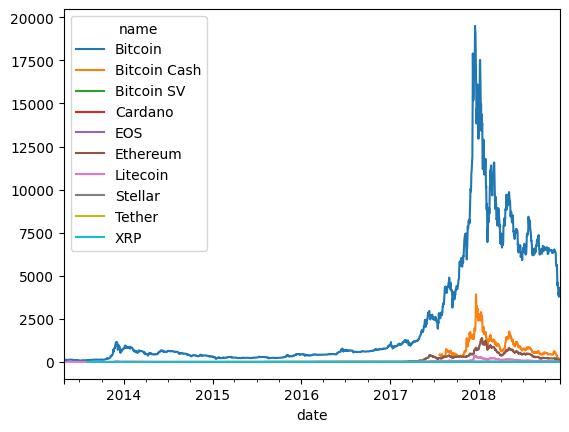

In [142]:
data_top10.groupby(['date', 'name'])['close'].mean().unstack().plot()


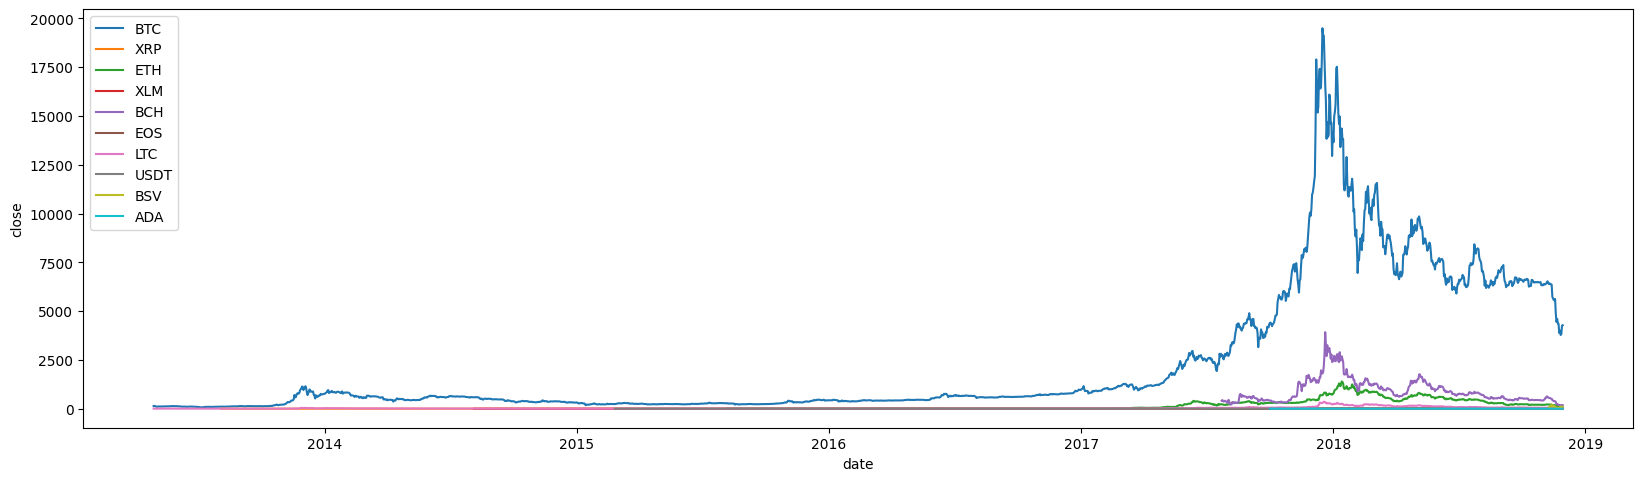

In [151]:
plt.figure(figsize=(20,25))
plt.subplot(4,1,1)
sns.lineplot(data=data_top10, x="date", y="close", hue='symbol')
plt.legend(loc='upper left')
plt.show()




<Axes: xlabel='name', ylabel='name'>

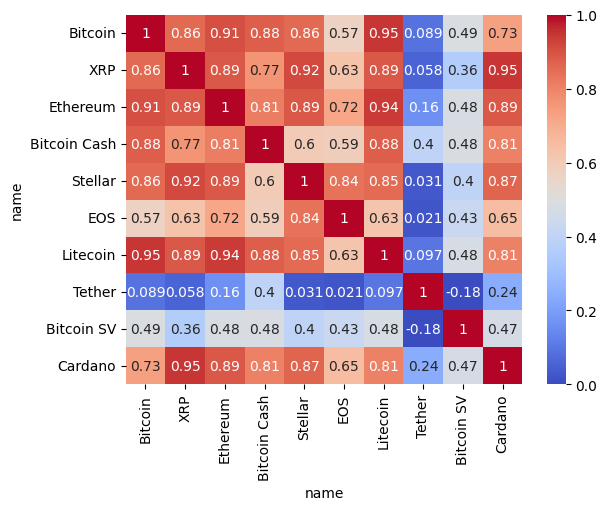

In [144]:
sns.heatmap(currencies_in_time[top10].corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)